In [417]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [418]:
%matplotlib inline

In [419]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.figsize'] = (20, 10)

In [420]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [421]:
transmissionlines_data = pd.read_csv("ElectricityTransmissionLines_v2.csv")
transmissionlines_visual = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
transmissionlines_visual.set_crs(epsg=5234, inplace=True, allow_override=True) 
popdensity = gp.GeoDataFrame.from_file('PopWghtdDensityChange2011_14.shp')
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
print("done")

done


In [422]:
transmissionlines_data.head()

,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,CAPACITYKV,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,SHAPE_Length
0,1,Transmission Line,A network of wires and insulators used to conn...,Overhead,1,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.010167
1,2,Transmission Line,A network of wires and insulators used to conn...,Overhead,2,Callide B Power Station to Calvale,Operational,275,Queensland,5,20120710,NaN,0.011240
2,3,Transmission Line,A network of wires and insulators used to conn...,Overhead,3,Calvale to Callide A Power Station,Operational,132,Queensland,5,20120710,NaN,0.009304
3,4,Transmission Line,A network of wires and insulators used to conn...,Overhead,4,Braemar to Bulli Creek,Operational,330,Queensland,5,20120710,NaN,0.830194
4,5,Transmission Line,A network of wires and insulators used to conn...,Overhead,5,Moura to Biloela Tee,Operational,132,Queensland,5,20120710,NaN,0.466893


What the hell was Shape_Length?

In [423]:
transmissionlines_data.columns

Index(['OBJECTID', 'FEATURETYPE', 'DESCRIPTION', 'CLASS', 'FID', 'NAME',
       'OPERATIONALSTATUS', 'CAPACITYKV', 'STATE', 'SPATIALCONFIDENCE',
       'REVISED', 'COMMENT', 'SHAPE_Length'],
      dtype='object')

In [424]:
transmissionlines_data.groupby("FID").SHAPE_Length.value_counts()

FID   SHAPE_Length
1     0.010167        2
2     0.011240        2
3     0.009304        2
4     0.830194        2
5     0.466893        2
                     ..
2373  0.130758        2
2374  0.307455        2
2375  0.709393        2
2376  0.202119        2
2377  0.297638        2
Name: SHAPE_Length, Length: 2375, dtype: int64

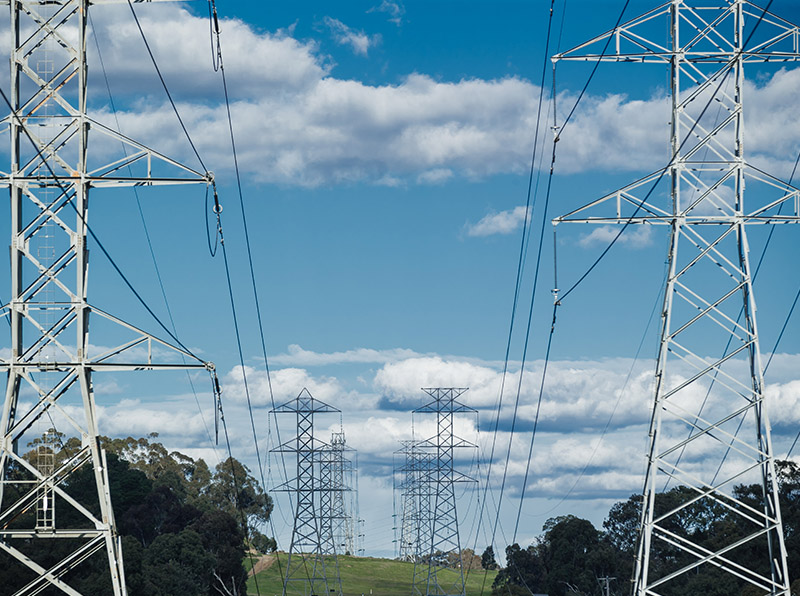

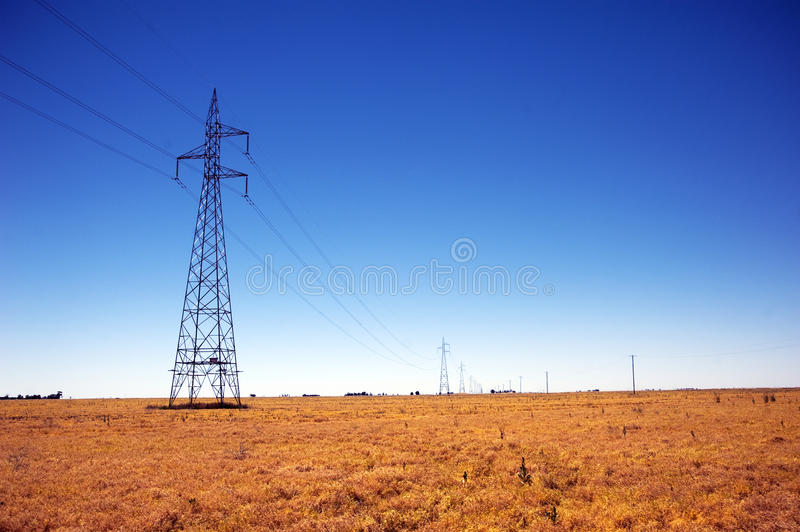

<AxesSubplot:>

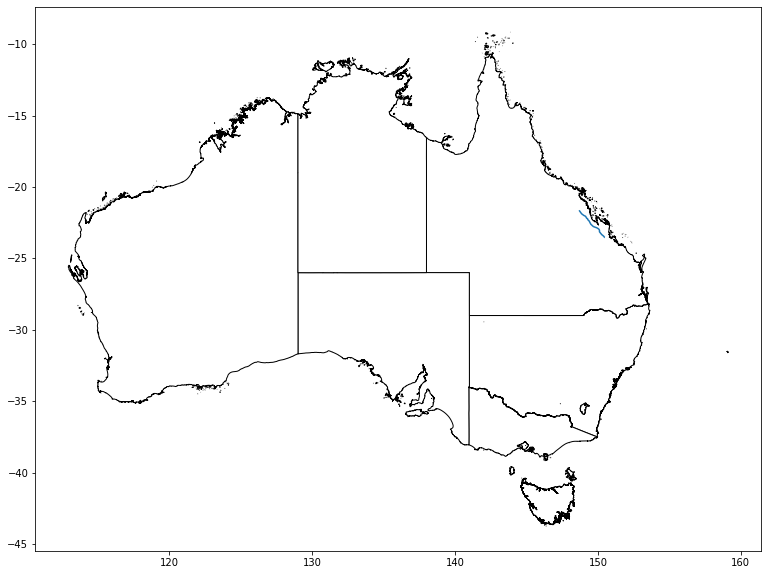

In [425]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
tlines = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
tlines.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
f = transmissionlines_data.groupby("SHAPE_Length").OBJECTID.min()
g = transmissionlines_data["NAME"].iloc[int(f.iloc[-5] - 1)]
h = transmissionlines_visual["Name"].astype(str) == str(g)
transmissionlines_visual[h].plot(ax=ax)

<AxesSubplot:>

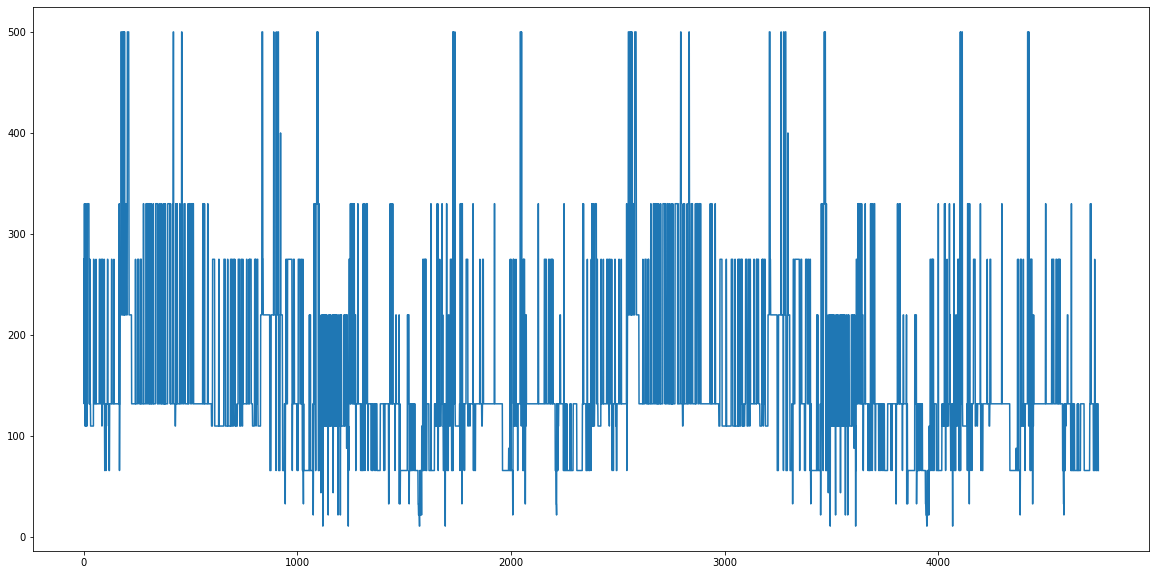

In [426]:
transmissionlines_data["CAPACITYKV"].plot()

<AxesSubplot:>

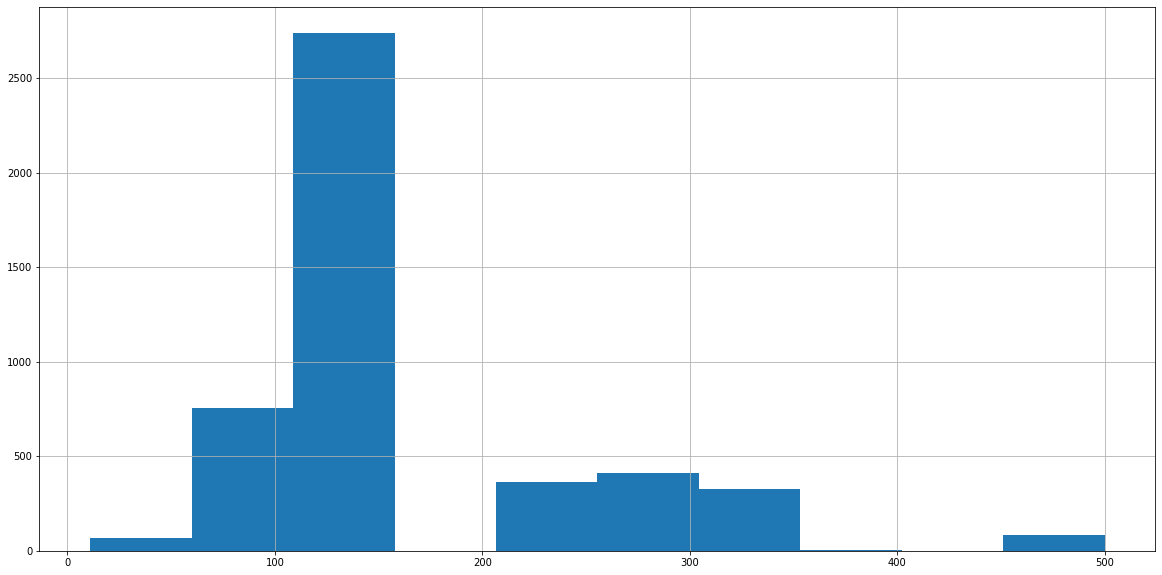

In [427]:
transmissionlines_data["CAPACITYKV"].hist()

<AxesSubplot:>

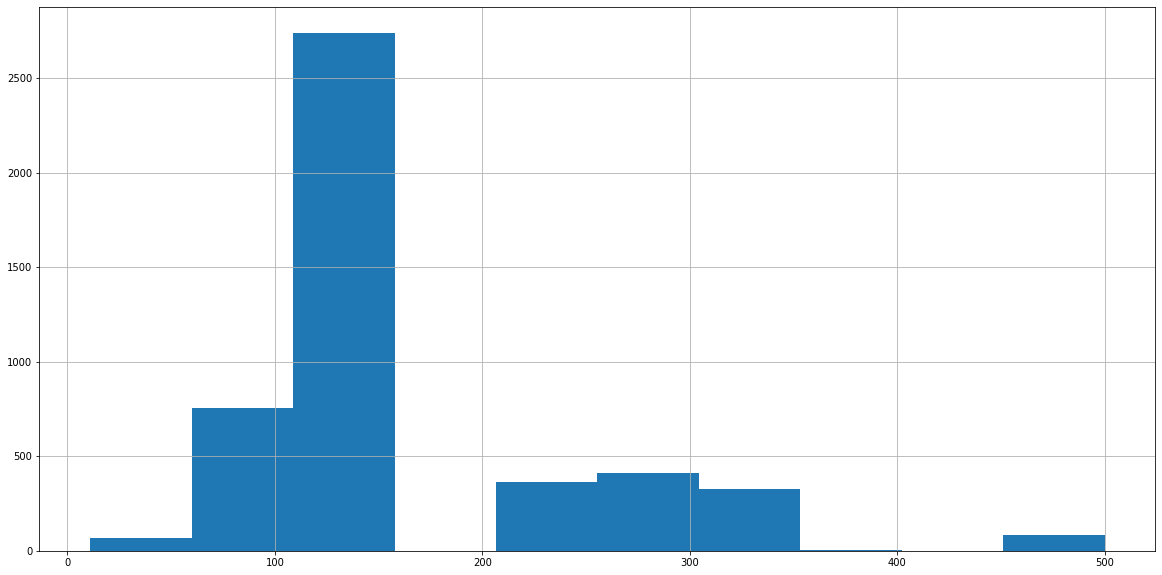

In [428]:
transmissionlines_data.CAPACITYKV[transmissionlines_data.CAPACITYKV < 600].hist()

In [429]:
transmissionlines_data["CAPACITYKV"].min()

11

Text(0.5, 0, 'State')

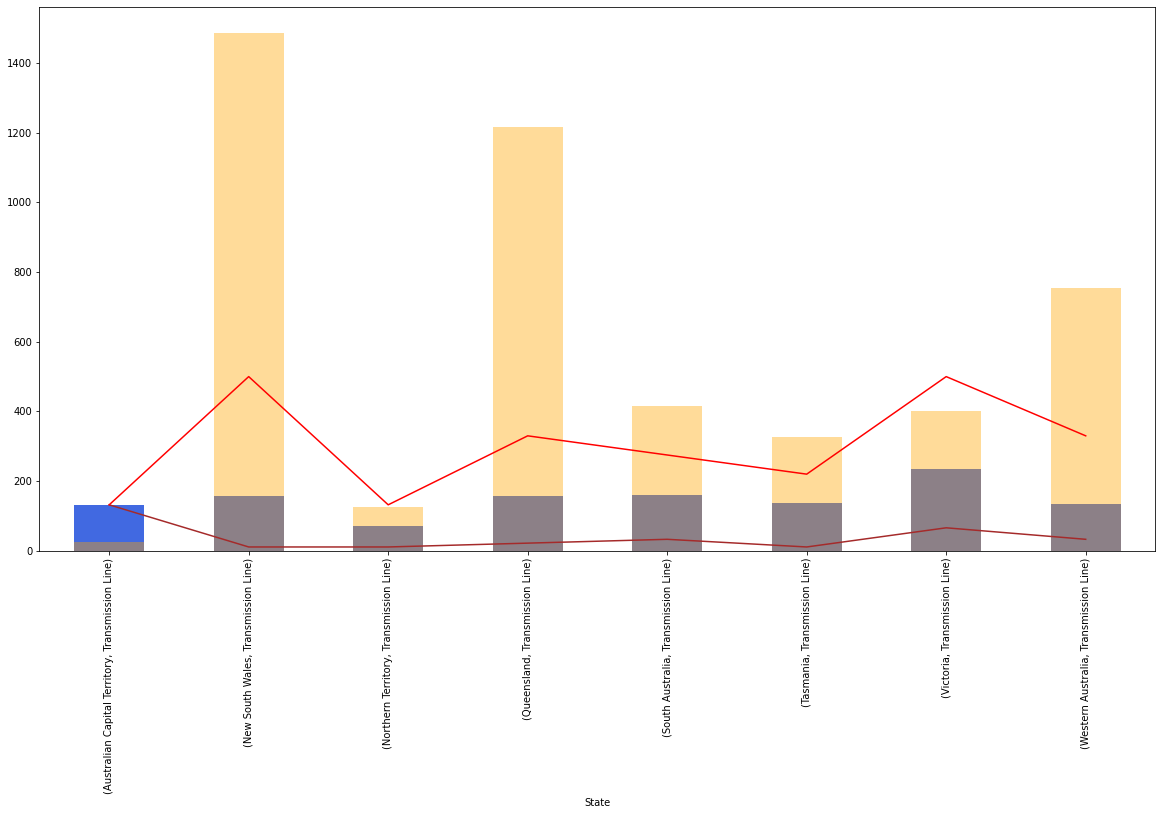

In [430]:
f1 = transmissionlines_data.groupby("STATE").CAPACITYKV.mean()
f2 = transmissionlines_data.groupby("STATE").CAPACITYKV.min()
f3 = transmissionlines_data.groupby("STATE").CAPACITYKV.max()
f4 = transmissionlines_data.groupby("STATE").FEATURETYPE.value_counts() 
ax = f1.plot(kind='bar',alpha=1,color='royalblue')
f2.plot(ax=ax,color='brown')
f3.plot(ax=ax,color='red')
f4.plot(ax=ax,kind='bar',color='orange', alpha=0.4)
plt.xlabel("State")

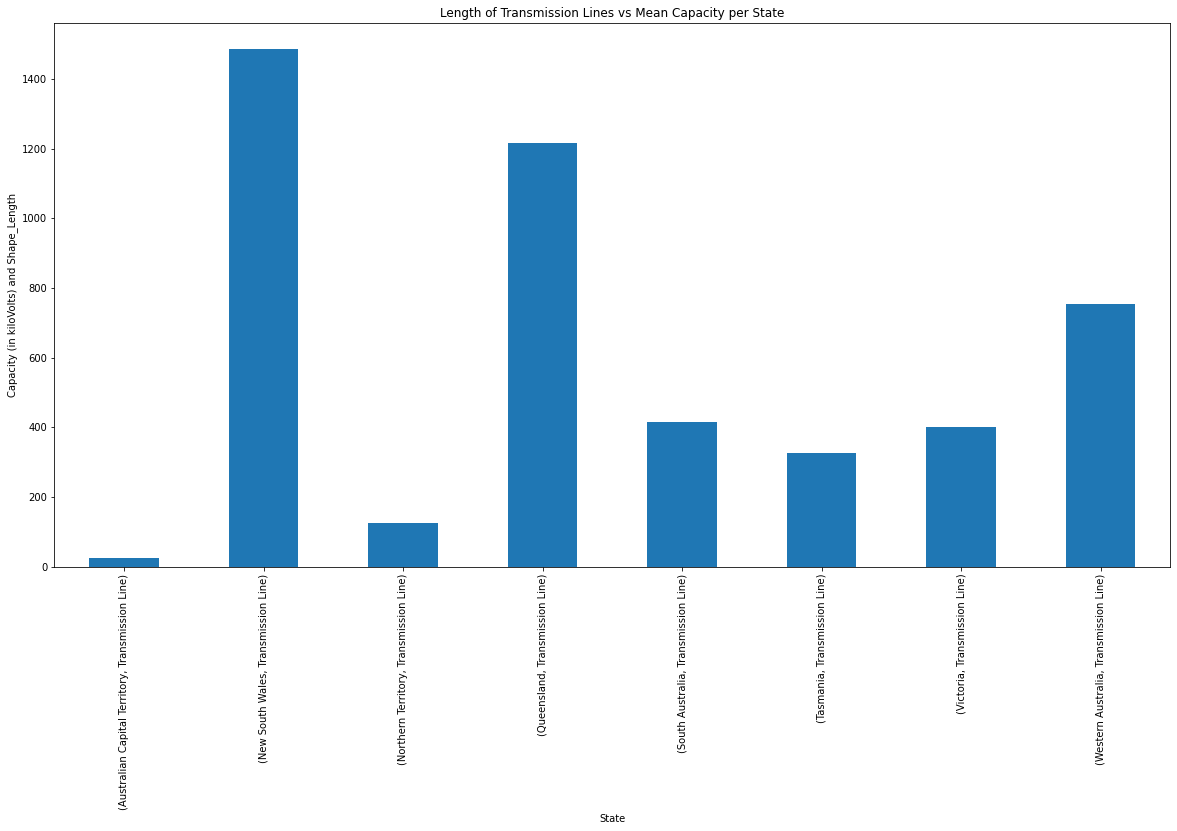

In [431]:
plt.title("Length of Transmission Lines vs Mean Capacity per State")
t1 = transmissionlines_data.groupby("STATE").FEATURETYPE.value_counts()
t1.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Capacity (in kiloVolts) and Shape_Length")
plt.show()

In [432]:
transmissionlines_visual = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
transmissionlines_visual.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
transmissionlines_visual.sample(120)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,DESCRIPTON,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry
1363,Hurstville North to Peakhurst,None,1,1,None,Transmission Line,0.0350308058736951,Hurstville North to Peakhurst,2094,1,20160302,A network of wires and insulators used to conn...,132,New South Wales,Operational,2115,Underground,"LINESTRING (151.063 -33.966, 151.096 -33.955)"
1712,Lismore to Koolkhan,None,1,1,None,Transmission Line,0.836708365666994,Lismore to Koolkhan,289,5,20120710,A network of wires and insulators used to conn...,132,New South Wales,Operational,290,Overhead,"LINESTRING (152.933 -29.616, 152.932 -29.616, ..."
1861,South Pine to Hays Inlet,None,1,1,None,Transmission Line,0.158054404528312,South Pine to Hays Inlet,692,5,20120710,A network of wires and insulators used to conn...,110,Queensland,Operational,695,Overhead,"LINESTRING (152.970 -27.324, 152.972 -27.325, ..."
630,Eraring 500 to Eraring 330,None,1,1,None,Transmission Line,0.000815149019865383,Eraring 500 to Eraring 330,1093,5,20120710,A network of wires and insulators used to conn...,500,New South Wales,Operational,1099,Overhead,"LINESTRING (151.515 -33.062, 151.515 -33.061)"
1594,Baralaba to Dingo Tee,None,1,1,None,Transmission Line,0.711802557281629,Baralaba to Dingo Tee,63,5,20120710,A network of wires and insulators used to conn...,132,Queensland,Operational,63,Overhead,"LINESTRING (149.874 -24.191, 149.875 -24.191, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,Kurnell to Cronulla and Sydney South,None,1,1,None,Transmission Line,0.0691665658084818,Kurnell to Cronulla and Sydney South,1916,5,20130801,A network of wires and insulators used to conn...,132,New South Wales,Operational,1932,Overhead,"LINESTRING (151.144 -34.038, 151.147 -34.038, ..."
30,North Goonyella to North Goonyella Tee,None,1,1,None,Transmission Line,0.0446921322282573,North Goonyella to North Goonyella Tee,49,5,20120710,A network of wires and insulators used to conn...,132,Queensland,Operational,49,Overhead,"LINESTRING (148.011 -21.643, 148.011 -21.643, ..."
2079,Yerbillon Tee to Southern Cross,None,1,1,None,Transmission Line,0.623228284833573,Yerbillon Tee to Southern Cross,1387,5,20120710,A network of wires and insulators used to conn...,66,Western Australia,Operational,1397,Overhead,"LINESTRING (119.311 -31.198, 119.311 -31.198, ..."
1577,Millmerran to Middle Ridge,None,1,1,None,Transmission Line,0.924440691303375,Millmerran to Middle Ridge,25,5,20120710,A network of wires and insulators used to conn...,330,Queensland,Operational,25,Overhead,"LINESTRING (151.274 -27.965, 151.276 -27.965, ..."


In [433]:
cols_to_drop = ["DESCRIPTON", "NSW_LOCA_3", "NSW_LOCA_4","NSW_LOCA_5","NSW_LOCA_7", "DT_RETIRE"]
transmissionlines_visual.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
transmissionlines_visual.head(2)

,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry
0,Callide B Power Station to Calvale,None,1,1,None,Transmission Line,0.0101670994252775,Callide B Power Station to Calvale,1,5,20120710,275,Queensland,Operational,1,Overhead,"LINESTRING (150.620 -24.345, 150.620 -24.346, ..."
1,Callide B Power Station to Calvale,None,1,1,None,Transmission Line,0.0112400629710936,Callide B Power Station to Calvale,2,5,20120710,275,Queensland,Operational,2,Overhead,"LINESTRING (150.627 -24.343, 150.626 -24.343, ..."


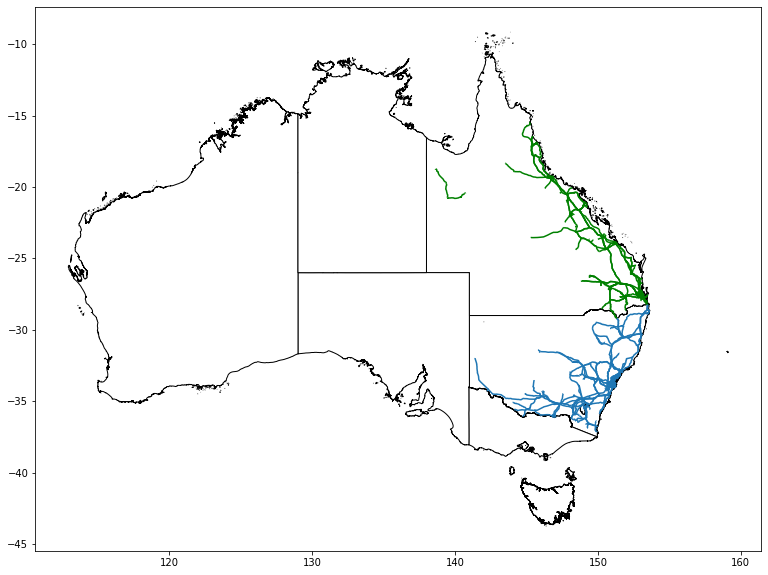

In [452]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
test1 = transmissionlines_visual["STATE"].astype(str) == "Queensland"
test2 = transmissionlines_visual["STATE"].astype(str) == "New South Wales"
transmissionlines_visual[test1].geometry.plot(ax=ax, color='green')
transmissionlines_visual[test2].geometry.plot(ax=ax)
a = transmissionlines_visual.iloc[0]

0       True
1       True
2       True
3       True
4       True
        ... 
2370    True
2371    True
2372    True
2373    True
2374    True
Name: CLASS, Length: 2375, dtype: bool


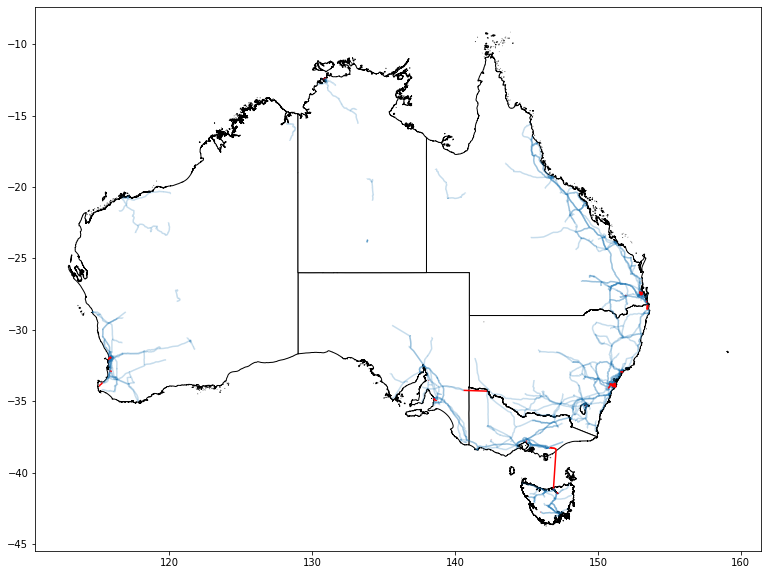

In [435]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
test1 = transmissionlines_visual["CLASS"].astype(str) == "Overhead"
test2 = transmissionlines_visual["CLASS"].astype(str) == "Underground"
transmissionlines_visual[test1].geometry.plot(ax=ax,alpha=0.25)
transmissionlines_visual[test2].geometry.plot(ax=ax,color='red')
print(test1)

Name                         Callide B Power Station to Calvale
descriptio                                                 None
tessellate                                                    1
visibility                                                    1
COMMENT                                                    None
FEATURETYP                                    Transmission Line
SHAPE_Leng                                   0.0101670994252775
NAME2                        Callide B Power Station to Calvale
OBJECTID                                                      1
SPATIALCON                                                    5
REVISED                                                20120710
CAPACITYKV                                                  275
STATE                                                Queensland
OPERATIONA                                          Operational
FID                                                           1
CLASS                                   

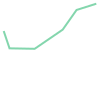

In [436]:
a = transmissionlines_visual.iloc[0]
print(a)
a.geometry

In [437]:
def add_centroid(row):
    return row.geometry.centroid

transmissionlines_visual["centroid"] = transmissionlines_visual.apply(add_centroid, axis=1)

transmissionlines_visual.sample(2)

c:\Users\Evan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Name,descriptio,tessellate,visibility,COMMENT,FEATURETYP,SHAPE_Leng,NAME2,OBJECTID,SPATIALCON,REVISED,CAPACITYKV,STATE,OPERATIONA,FID,CLASS,geometry,centroid
737,Hadspen to Trevallyn,None,1,1,None,Transmission Line,0.0872532721851856,Hadspen to Trevallyn,1140,5,20120710,110,Tasmania,Operational,1146,Overhead,"LINESTRING (147.095 -41.501, 147.097 -41.499, ...",POINT (147.10539 -41.46143)
1677,Robertstown to Morgan-Whyalla 4 Pump Station,None,1,1,None,Transmission Line,0.0772035084787722,Robertstown to Morgan-Whyalla 4 Pump Station,232,5,20120710,132,South Australia,Operational,232,Overhead,"LINESTRING (139.063 -33.966, 139.064 -33.966, ...",POINT (139.09993 -33.95933)


POINT (150.62339098942996 -24.344950770484452)


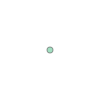

In [438]:
a = transmissionlines_visual.iloc[0]
print(a.centroid)
a.centroid

<AxesSubplot:>

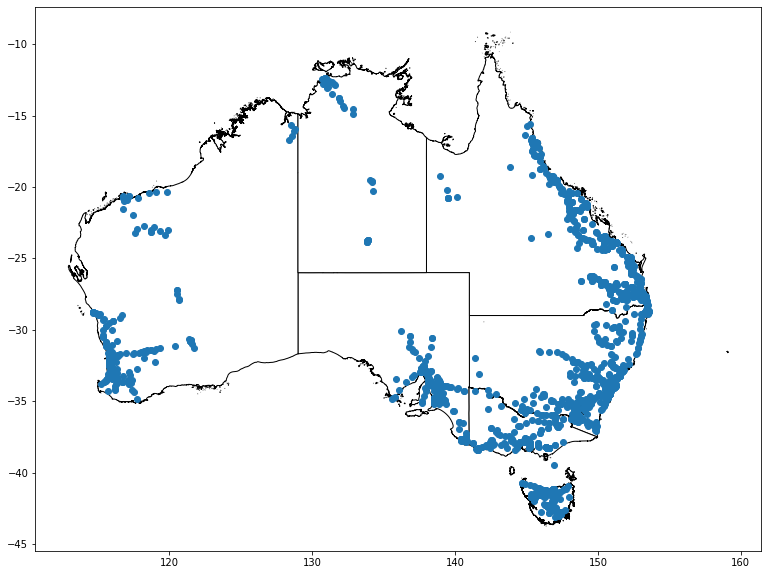

In [439]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
transmissionlines_visual.centroid.plot(ax=ax)

In [440]:
right_here = shapely.geometry.point.Point(147.0167, -32.16333)
transmissionlines_visual["distance_from_centre_NSW"] = transmissionlines_visual.centroid.distance(right_here)


Text(0.5, 1.0, 'Distribution of distances from center of NSW')

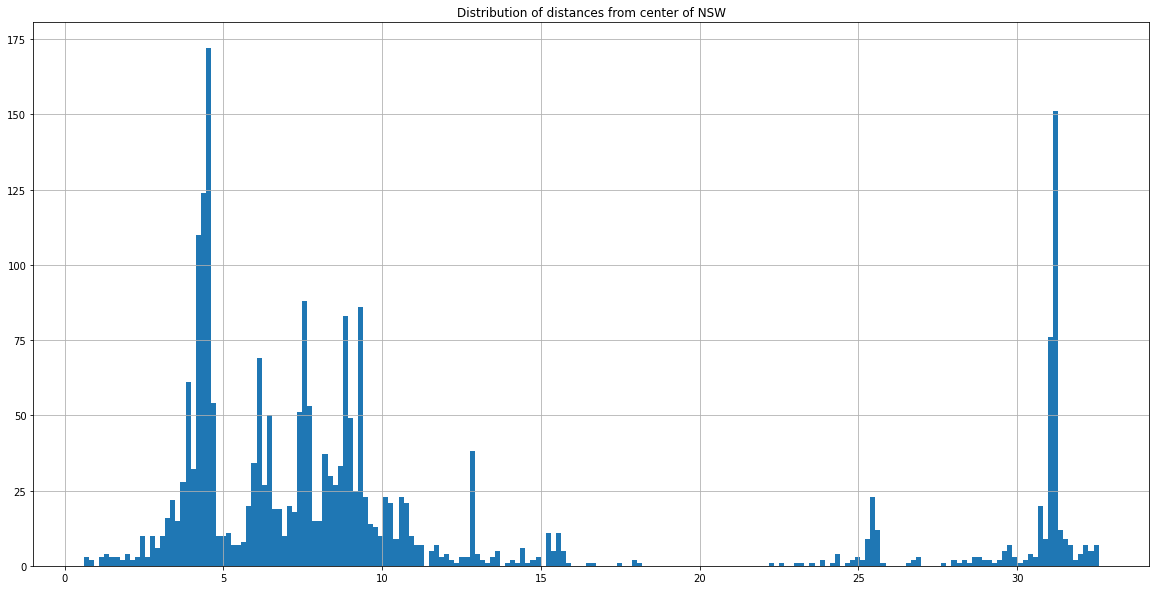

In [441]:
transmissionlines_visual.distance_from_centre_NSW.hist(bins=200)
plt.title("Distribution of distances from center of NSW")

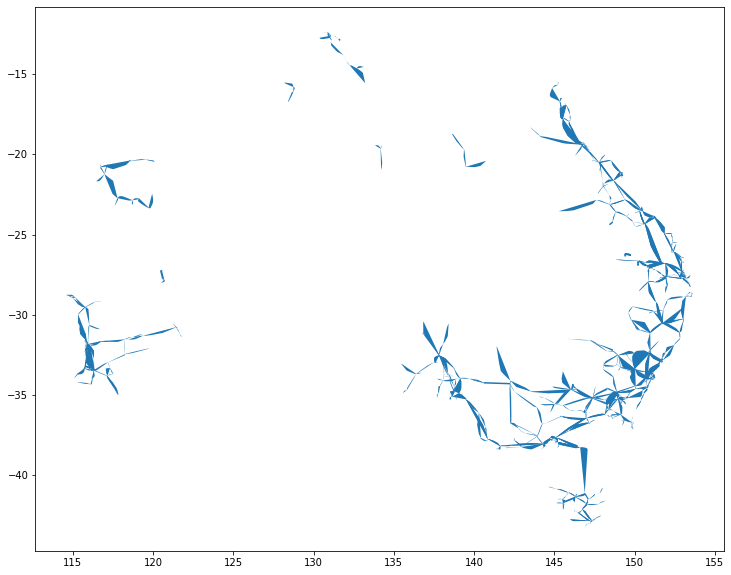

In [443]:
close_transmissionlines_visual.geometry.convex_hull.plot();

In [444]:
transmissionlines_visual.iloc[2]

Name                                       Calvale to Callide A Power Station
descriptio                                                               None
tessellate                                                                  1
visibility                                                                  1
COMMENT                                                                  None
FEATURETYP                                                  Transmission Line
SHAPE_Leng                                                0.00930362099296361
NAME2                                      Calvale to Callide A Power Station
OBJECTID                                                                    3
SPATIALCON                                                                  5
REVISED                                                              20120710
CAPACITYKV                                                                132
STATE                                                           

In [445]:
transmissionlines_visual.groupby("STATE").distance_from_centre_NSW.max()

STATE
Australian Capital Territory     3.854092
New South Wales                  7.563291
Northern Territory              25.613057
Queensland                      16.690065
South Australia                 11.738602
Tasmania                        10.923243
Victoria                         8.319627
Western Australia               32.564821
Name: distance_from_centre_NSW, dtype: float64

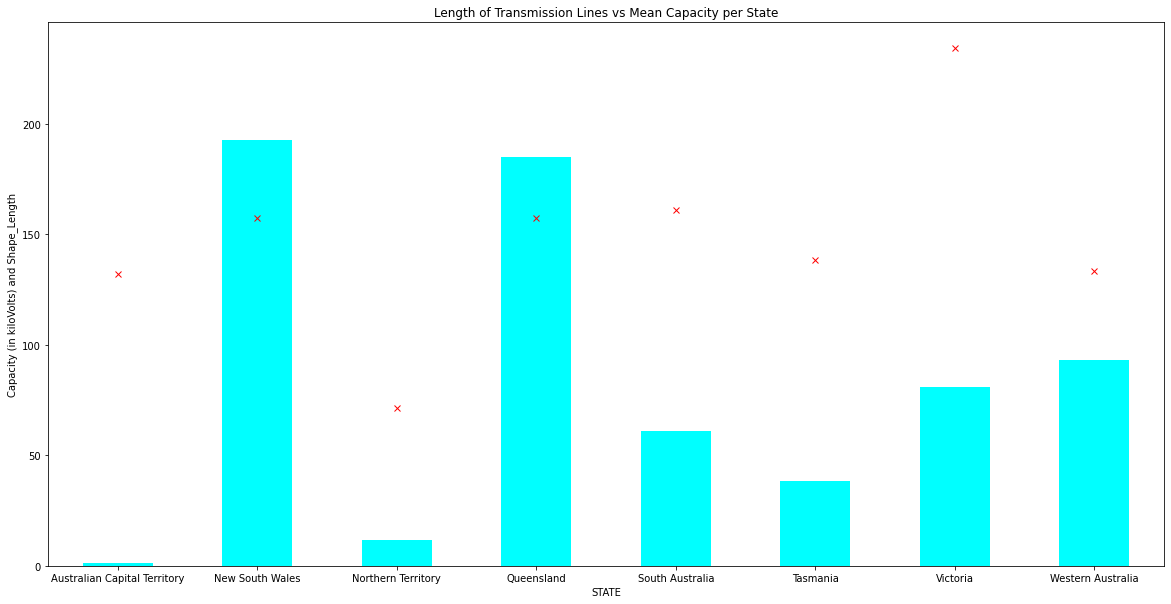

STATE
Australian Capital Territory      1.118655
New South Wales                 192.688997
Northern Territory               11.519270
Queensland                      184.670627
South Australia                  61.143735
Tasmania                         38.502326
Victoria                         81.055973
Western Australia                93.199794
Name: SHAPE_Leng, dtype: float64
STATE
Australian Capital Territory    132.000000
New South Wales                 157.471063
Northern Territory               71.238095
Queensland                      157.310855
South Australia                 160.875000
Tasmania                        138.478528
Victoria                        234.119403
Western Australia               133.400531
Name: CAPACITYKV, dtype: float64


In [446]:
transmissionlines_visual["SHAPE_Leng"] = pd.to_numeric(transmissionlines_visual["SHAPE_Leng"])
tline1 = transmissionlines_visual.groupby("STATE").SHAPE_Leng.sum()
tline2 = transmissionlines_data.groupby("STATE").CAPACITYKV.mean()
ax = tline1.plot(kind='bar',color='aqua')
plt.title("Length of Transmission Lines vs Mean Capacity per State")
plt.xlabel("State")
plt.ylabel("Capacity (in kiloVolts) and Shape_Length")
tline2.plot(ax=ax, color='red',style='x')
plt.show()
print(tline1)
print(tline2)

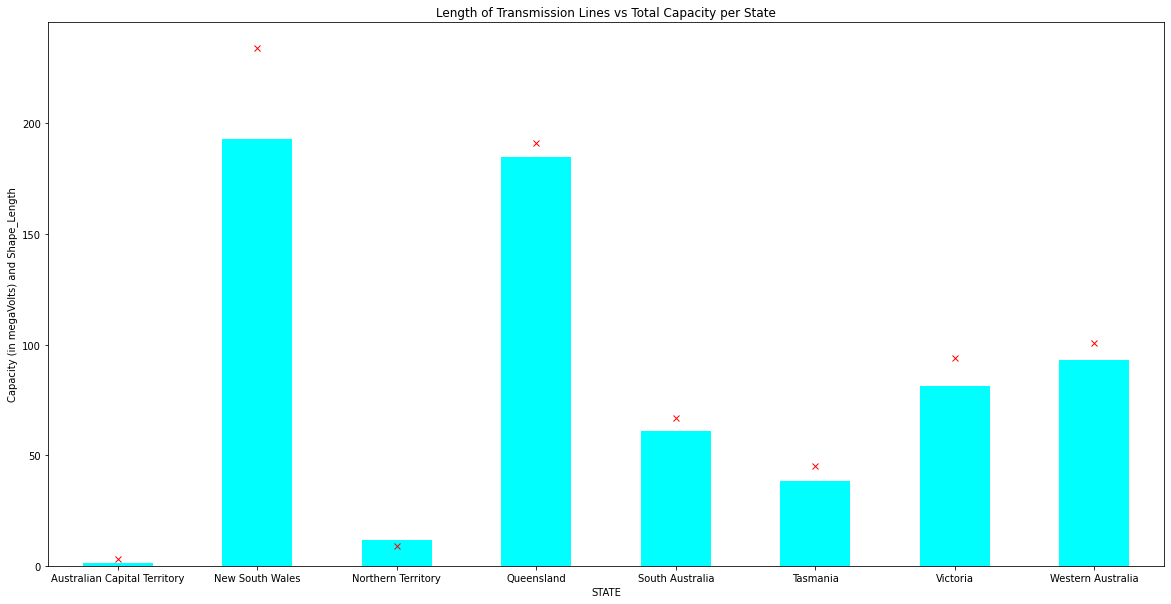

In [447]:
transmissionlines_visual["SHAPE_Leng"] = pd.to_numeric(transmissionlines_visual["SHAPE_Leng"])
tline1 = transmissionlines_visual.groupby("STATE").SHAPE_Leng.sum()
tline2 = transmissionlines_data.groupby("STATE").CAPACITYKV.sum() / 1000
ax = tline1.plot(kind='bar',color='aqua')
plt.title("Length of Transmission Lines vs Total Capacity per State")
plt.xlabel("State")
plt.ylabel("Capacity (in megaVolts) and Shape_Length")
tline2.plot(ax=ax, color='red',style='x')
plt.show()

In [449]:
tlines = gp.GeoDataFrame.from_file('ElectricityTransmissionLines_v2-line.shp')
tlines.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
tlines.sample(2)
cols_to_drop = ["DESCRIPTON", "descriptio", "tessellate","visibility","COMMENT", "FEATURETYP","NAME2","OBJECTID","SPATIALCON","REVISED","CAPACITYKV","STATE","OPERATIONA","FID","CLASS"]
tlines.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
tlines.sample(2)
tlines.iloc[0]
f4 = transmissionlines_data.groupby("STATE").FEATURETYPE.value_counts() 
f4

STATE                         FEATURETYPE      
Australian Capital Territory  Transmission Line      24
New South Wales               Transmission Line    1486
Northern Territory            Transmission Line     126
Queensland                    Transmission Line    1216
South Australia               Transmission Line     416
Tasmania                      Transmission Line     326
Victoria                      Transmission Line     402
Western Australia             Transmission Line     754
Name: FEATURETYPE, dtype: int64

CAPACITYKV vs TLINE LENGTH vs POPULATION DENSITY

| State |SHAPE_Length | Avg Capacity (kV) | People per sq km | No. Tlines | 
| --- | --- | --- | --- | --- |
| ACT | 1.118655 | 132 | 192.4 | 24 |
| NSW | 192.688 | 157.471 | 10.10 | 1486 |
| QLD | 184.6706 | 157.310 | 3.01 | 1216 |
| NT | 11.51927 | 71.238 | 0.18 | 126 | 
| SA | 61.143 | 160.875 | 1.83 | 416 | 
| TAS | 38.502 | 138.478 | 8.36 | 326 | 
| VIC | 81.055 | 234.119 | 28.79 | 402 | 
| WA | 93.199 | 133.400 | 1.09 | 754 | 


<AxesSubplot:>

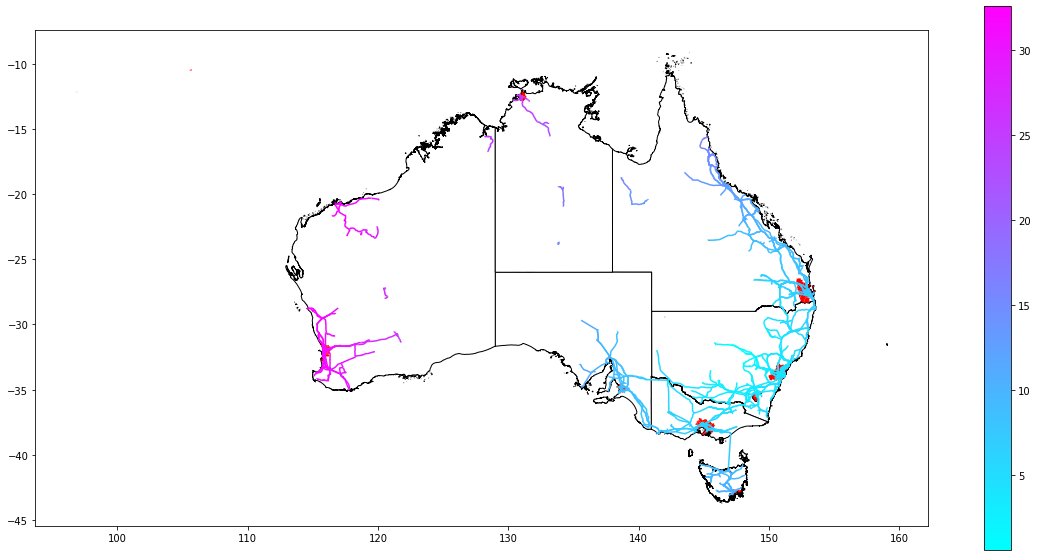

In [453]:
fig , ax = plt.subplots(1,1)
ausmap = gp.GeoDataFrame.from_file('aust_cd66states.shp')
ausmap.set_crs(epsg=5234, inplace=True, allow_override=True)
ausmap.plot(ax=ax, color='#ffffff', edgecolor='#000000')
close_transmissionlines_visual = transmissionlines_visual[transmissionlines_visual.distance_from_centre_NSW < 50]
close_transmissionlines_visual.plot(ax=ax, column='distance_from_centre_NSW', cmap='cool',legend=True)
popdensity.plot(ax=ax,color='red')